## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
from random import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
import glob
from os.path import join, exists, expanduser

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/gdrive/My Drive/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [15]:
import pandas as pd
labels = pd.read_csv('labels.csv')
labels.shape

(10222, 2)

### Print the count of each category of Dogs given in the dataset



In [0]:
breed_count = labels['breed'].value_counts()

In [17]:
print(breed_count.head(30))

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
pomeranian              111
great_pyrenees          111
basenji                 110
samoyed                 109
airedale                107
tibetan_terrier         107
leonberg                106
cairn                   106
beagle                  105
japanese_spaniel        105
miniature_pinscher      102
blenheim_spaniel        102
australian_terrier      102
irish_wolfhound         101
saluki                   99
lakeland_terrier         99
papillon                 96
siberian_husky           95
norwegian_elkhound       95
whippet                  95
pug                      94
chow                     93
italian_greyhound        92
pembroke                 92
Name: breed, dtype: int64


### Get one-hot encodings of labels

In [0]:
targets        = pd.Series(labels['breed'])
one_hot        = pd.get_dummies(targets, sparse = True)
one_hot_labels = np.asarray(one_hot)

In [19]:
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows    = 128 
img_cols    = 128
img_channel = 3

In [21]:
from tqdm import tqdm
import cv2
x_train_features = []
y_train_features = []
y_train_labels = []
i = 0 

for f, img in tqdm(labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img, (img_rows,img_cols))
  label = one_hot_labels[i]
  x_train_features.append(train_img_resize)
  y_train_features.append(img)
  y_train_labels.append(label)
  i = i+1

100%|██████████| 10222/10222 [00:27<00:00, 369.65it/s]


In [22]:
y_train_features[0]

'boston_bull'

In [23]:
y_train_labels[:1]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)]

In [24]:
os.listdir()

['.config',
 'train',
 'gdrive',
 'labels.csv',
 'test',
 'sample_submission.csv',
 'sample_data']

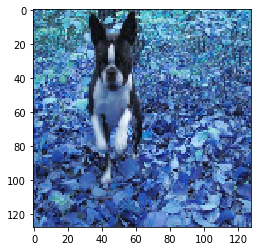

In [25]:
plt.imshow(x_train_features[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
#Normalizing the training data
x_train_raw = np.array(x_train_features, np.float32) / 255

y_train_raw = np.array(y_train_labels, np.uint8)

In [0]:
#Resizing the training data into 4 dimensions

x_train_raw = x_train_raw.reshape(x_train_raw.shape[0],128,128,3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample = pd.read_csv('sample_submission.csv')

In [30]:
test_img = sample['id']
test_img.head(2)

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [31]:
x_test_features = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_features.append(img_resize)

100%|██████████| 10357/10357 [00:27<00:00, 382.56it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_raw = np.array(x_test_features, np.float32) / 255

In [0]:
x_test_raw = x_test_raw.reshape(x_test_raw.shape[0],128,128,3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation , Conv2D, Dropout, MaxPooling2D, Flatten

In [0]:
cnn1 = Sequential()

# Adding two conv layers
cnn1.add(Conv2D(32, kernel_size=(5, 3), activation='relu', input_shape=(128,128,3)))

cnn1.add(Conv2D(32, kernel_size=(5, 3), activation='relu', input_shape=(128,128,3)))

# Flatten 
cnn1.add(Flatten())

# Adding Dense Layers
cnn1.add(Dense(256, activation='relu'))

cnn1.add(Dense(120, activation='softmax'))

# Compiling the model using Adam optimizer and categorical_crossentropy loss 
cnn1.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

### Use batch_size = 128 and epochs = 10 and execute the model

In [36]:
# Training the model with batch_size =128 and no.of epochs=10. 
cnn1.fit(x_train, y_train, batch_size=128, 
                  validation_data=(x_val, y_val), epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7155 samples, validate on 3067 samples
Epoch 1/10





7155/7155 [==============================] - 24s 3ms/step - loss: 5.4420 - acc: 0.0105 - val_loss: 4.7830 - val_acc: 0.0101
Epoch 2/10
7155/7155 [==============================] - 7s 1ms/step - loss: 4.6001 - acc: 0.0470 - val_loss: 4.6733 - val_acc: 0.0274
Epoch 3/10
7155/7155 [==============================] - 7s 1ms/step - loss: 2.7658 - acc: 0.4217 - val_loss: 5.6547 - val_acc: 0.0320
Epoch 4/10
7155/7155 [==============================] - 7s 1ms/step - loss: 0.3999 - acc: 0.9215 - val_loss: 8.3379 - val_acc: 0.0336
Epoch 5/10
7155/7155 [==============================] - 7s 1ms/step - loss: 0.0379 - acc: 0.9957 - val_loss: 9.3678 - val_acc: 0.0274
Epoch 6/10
7155/7155 [==============================] - 7s 1ms/step - loss: 0.0127 - acc: 0.9990 - val_loss: 9.5087 - val_acc: 0.0310
Epoch 7/10
7155/7155 [=======================

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(rotation_range=45,
                             rescale=1/255,
                             width_shift_range=0.2, 
                             height_shift_range=0.2)

In [0]:

data = ImageDataGenerator(validation_split=0.2, 
                          rescale=1/255,
                          samplewise_center=True, # set input mean to 0 over the sample
                          samplewise_std_normalization=True,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = data.flow(x_train,y_train)

In [0]:
val_generator = data.flow(x_val,y_val)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [44]:
from keras.utils import Sequence
# Training the model with batch_size =128 and no.of epochs=10. 
cnn2 =  cnn1.fit_generator(train_generator, epochs=10, validation_data=val_generator, steps_per_epoch = 10, validation_steps= 10 )

Epoch 1/10
10/10 [==============================] - 2s 244ms/step - loss: 15.9234 - acc: 0.0094 - val_loss: 15.9166 - val_acc: 0.0125
Epoch 2/10
10/10 [==============================] - 2s 234ms/step - loss: 15.8663 - acc: 0.0156 - val_loss: 15.9166 - val_acc: 0.0125
Epoch 3/10
10/10 [==============================] - 2s 240ms/step - loss: 16.1181 - acc: 0.0000e+00 - val_loss: 16.0174 - val_acc: 0.0063
Epoch 4/10
10/10 [==============================] - 2s 236ms/step - loss: 16.1181 - acc: 0.0000e+00 - val_loss: 15.9670 - val_acc: 0.0094
Epoch 5/10
10/10 [==============================] - 2s 229ms/step - loss: 15.9670 - acc: 0.0094 - val_loss: 15.9166 - val_acc: 0.0125
Epoch 6/10
10/10 [==============================] - 2s 227ms/step - loss: 15.9166 - acc: 0.0125 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 2s 230ms/step - loss: 16.1181 - acc: 0.0000e+00 - val_loss: 15.7151 - val_acc: 0.0250
Epoch 8/10
10/10 [============================

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [49]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/gdrive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),include_top=False, pooling='avg')

Print the summary of the base_model

In [50]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [51]:
x = base_model.output
#x = (Flatten())(x)
x = Dense(1024, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x) # let's add a fully-connected layer
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train
new_model = Model(inputs=base_model.input, outputs=predictions)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
# Making all layers in base model to be non-trainable.
for layer in base_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
new_model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [54]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [55]:
model_output =  new_model.fit_generator(train_generator, epochs=8, steps_per_epoch=1000 // 8,
                            validation_data=val_generator, validation_steps=600 // 8,
                            verbose = 1)

Epoch 1/8
125/125 [==============================] - 26s 205ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0486 - val_acc: 0.9917
Epoch 2/8
125/125 [==============================] - 24s 191ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0486 - val_acc: 0.9917
Epoch 3/8
125/125 [==============================] - 24s 189ms/step - loss: 0.0488 - acc: 0.9917 - val_loss: 0.0486 - val_acc: 0.9917
Epoch 4/8
125/125 [==============================] - 23s 188ms/step - loss: 0.0488 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9917
Epoch 5/8
125/125 [==============================] - 23s 188ms/step - loss: 0.0487 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9917
Epoch 6/8
125/125 [==============================] - 23s 187ms/step - loss: 0.0488 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9917
Epoch 7/8
125/125 [==============================] - 24s 188ms/step - loss: 0.0488 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9917
Epoch 8/8
125/125 [==============================] - 24s 191ms

In [56]:
model_output.history['acc'][:1]

[0.9916666746139526]